Project STATUS : 90% Complete :Requires Final Touch-ups before Deployment


In [7]:
import pandas as pd
import numpy as np
import skimpy as sk
import janitor
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [ ]:
data = pd.read_csv("E:\Projects 25\cafe-Complete\\dirty_cafe_sales.csv")

data.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


Clean column names make your code easier to read, write, and debug. They also ensure compatibility with functions that expect syntactically valid identifiers.

Step 1: Normalize columns names

In [ ]:
data = data.clean_names()

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10000  │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 8      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃           ┃      ┃       ┃           ┃           ┃           ┃           ┃ chars    ┃ words per ┃ total    ┃  │
│ ┃ column    ┃ NA   ┃ NA %  ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ per row  ┃ row       ┃ words    ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ transacti │    0 │     0 │ TXN_19613 │ TXN_19613 │ TXN_10005 │ TXN_99991 │       11 │         1 │    10000 │  │
│ │ on_id     │      │       │ 73        │ 73        │ 55        │ 24        │          │           │          │  │
│ │ item      │  333 │  3.33 │ Tea       │ Smoothie  │ Cake      │ UNKNOWN   │     5.65 │      0.97 │     9667 │  │
│ │ quantity  │  138 │  1.38 │ 2         │ UNKNOWN   │ 1         │ UNKNOWN   │     1.17 │      0.99 │     9862 │  │
│ │ price_per │  179 │  1.79 │ 2.0       │ UNKNOWN   │ 1.0       │ UNKNOWN   │     3.11 │      0.98 │     9821 │  │
│ │ _unit     │      │       │           │           │           │           │          │           │          │  │
│ │ total_spe │  173 │  1.73 │ 4.0       │ UNKNOWN   │ 1.0       │ UNKNOWN   │     3.47 │      0.98 │     9827 │  │
│ │ nt        │      │       │           │           │           │           │          │           │          │  │
│ │ payment_m │ 2579 │ 25.79 │ Cash      │ Digital   │ Cash      │ UNKNOWN   │     9.39 │       1.2 │    11985 │  │
│ │ ethod     │      │       │           │ Wallet    │           │           │          │           │          │  │
│ │ location  │ 3265 │ 32.65 │ ERROR     │ Takeaway  │ ERROR     │ UNKNOWN   │     7.79 │      0.67 │     6735 │  │
│ │ transacti │  159 │  1.59 │ ERROR     │ 2023-09-0 │ 2023-01-0 │ UNKNOWN   │     9.88 │      0.98 │     9841 │  │
│ │ on_date   │      │       │           │ 8         │ 1         │           │          │           │          │  │
│ └───────────┴──────┴───────┴───────────┴───────────┴───────────┴───────────┴──────────┴───────────┴──────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Step 2: Flag Inconsistent Entries as Missing Values

In [ ]:
#Capturing Inconsistencies To Missing Values for Imputation 

nulls = ["ERROR","UNKNOWN"]

data.loc[data['item'].isin(nulls), 'item'] = np.nan
data.loc[data['payment_method'].isin(nulls), 'payment_method'] = np.nan
data.loc[data['location'].isin(nulls), 'location'] = np.nan
data.loc[data['transaction_date'].isin(nulls), 'transaction_date'] = np.nan
data.loc[data['quantity'].isin(nulls), 'quantity'] = np.nan
data.loc[data['price_per_unit'].isin(nulls), 'price_per_unit'] = np.nan
data.loc[data['total_spent'].isin(nulls), 'total_spent'] = np.nan


Logic & Purpose: In this dataset, certain fields contain placeholder values like "ERROR" or "UNKNOWN" — these are not valid data points and should not be treated as real entries. Instead of analyzing them directly, we convert these inconsistencies into NaN (missing values), which allows us to:

✅ Treat them uniformly during imputation

✅ Leverage pandas’ built-in missing data handling

✅ Avoid skewing statistics with invalid entries

Why This Matters: By explicitly marking these entries as missing, we streamline the cleaning process and ensure that imputation logic (e.g., filling with median, calculating from other columns) can be applied consistently. This step also improves transparency in how data quality issues are handled.

Step 3: Convert transaction_date to Datetime Format

In [ ]:
#Converting transaction_date to a datetime variable for Time-Series Analysis
data['transaction_date'] = pd.to_datetime(data['transaction_date'],errors='coerce')

Logic & Purpose: To perform time-based analysis — such as monthly revenue trends, seasonal patterns, or daily sales peaks — the transaction_date column must be in a proper datetime format. This transformation enables:

🗓️ Resampling by day, week, or month

📈 Plotting time-series graphs

📊 Grouping transactions over time intervals

Why errors='coerce'? Some entries may contain invalid or corrupted date strings. Setting errors='coerce' ensures that these are safely converted to NaT (Not a Time), which can then be handled as missing values during cleaning or excluded from time-based plots.

Outcome: This step prepares the dataset for robust time-series visualizations, such as:

Monthly revenue performance

Daily transaction volume

Seasonal product demand

Step 4: Impute Missing transaction_date with the Median

In [ ]:
#Imputation transaction date with the Most Common Variable
median_date = data['transaction_date'].median()  
data.fillna({'transaction_date': median_date}, inplace=True)

Logic & Purpose: After converting transaction_date to datetime format, some entries were flagged as missing (NaT) due to invalid or inconsistent values. Rather than dropping these rows — which could result in losing valuable sales data — we impute the missing dates using the median date from the dataset.

Why Median?

🧭 The median is robust to outliers and skewed distributions

📈 It preserves the central tendency of the time-series

🧹 It ensures continuity in trend analysis without introducing artificial spikes

Outcome: This step ensures that all transactions have a valid timestamp, enabling consistent time-based grouping (e.g., monthly revenue trends) and avoiding gaps in visualization

Step 5: Remove Records Missing Critical Transaction Data

In [ ]:
#Deleting Records whereby Key Data is missing from the records to avoid skewing data 
data = data.dropna(subset=['quantity','price_per_unit'], how='all')
data = data.dropna(subset=['quantity','total_spent'], how='all')
data = data.dropna(subset=['total_spent','price_per_unit'], how='all')

Logic & Purpose: This step removes rows where key transactional fields — quantity, price_per_unit, or total_spent — are entirely missing. These fields are essential for calculating revenue, averages, and performance metrics. If all values in a pair are missing, the record cannot be salvaged or imputed logically.

Why Drop Instead of Impute?

🔍 These fields are interdependent (e.g., total_spent = quantity × price_per_unit)

❌ If both components are missing, there's no reliable way to reconstruct the transaction

📉 Keeping such records would distort metrics like average price or total revenue

Outcome: By removing these unusable rows, we improve data quality and ensure that subsequent calculations are based on complete and trustworthy information.

Step 6: Convert Transaction Fields to Numeric Format

In [ ]:
#Converting quantity,price_per_unit,total_spent to numerical values for Revenu Analysis
data['quantity'] = pd.to_numeric(data['quantity'],errors='coerce')
data['price_per_unit'] = pd.to_numeric(data['price_per_unit'],errors='coerce')
data['total_spent'] = pd.to_numeric(data['total_spent'],errors='coerce')


Logic & Purpose: To perform accurate revenue analysis — including calculating totals, averages, and trends — the fields quantity, price_per_unit, and total_spent must be in numeric format. This step ensures that all values are treated as numbers, not strings or mixed types.

Why errors='coerce'?

Automatically converts non-numeric entries (e.g., "ERROR", "UNKNOWN") into NaN

Prevents runtime errors during calculations

Flags problematic entries for later imputation or removal

Outcome: This transformation prepares the dataset for reliable financial analysis, enabling operations like:

💰 Revenue aggregation

📊 Average price calculations

📈 Time-series revenue trends

📉 Identifying underperforming products

Step 7: Impute Missing Transaction Values Using Interdependent Columns

In [ ]:
sk.skim(data)

In [ ]:
#Filling In data using Current data 
data['total_spent'] = data['total_spent'].fillna(data['quantity'] * data['price_per_unit'])
data['quantity'] = data['quantity'].fillna(data['total_spent'] / data['price_per_unit'])
data['price_per_unit'] = data['price_per_unit'].fillna(data['total_spent'] / data['quantity'])

Logic & Purpose: The three core transaction fields — quantity, price_per_unit, and total_spent — are mathematically interdependent:

total_spent = quantity × price_per_unit

quantity = total_spent ÷ price_per_unit

price_per_unit = total_spent ÷ quantity

This relationship allows us to intelligently fill in missing values when at least two of the three fields are present. Instead of discarding incomplete records, we reconstruct the missing value using the available data.

Why This Works:

🧠 It’s a logic-based imputation, not a guess

💡 It preserves the financial integrity of each transaction

📊 It ensures that revenue calculations remain accurate and complete

Outcome: This step salvages partially missing records and strengthens the dataset for reliable revenue analysis, without introducing bias or arbitrary estimates.

Step 8: Replace Missing Categorical Values with Standard Placeholders

In [ ]:
#Establishing Null Values to A common Description 
data['item'] = data['item'].fillna('Other')
data['payment_method'] = data['payment_method'].fillna('Undefined')
data['location'] = data['location'].fillna("Undefined")

Logic & Purpose: After identifying and converting inconsistent entries ("ERROR", "UNKNOWN") to NaN, we assign meaningful placeholder values to missing categorical fields. This ensures that:

🧾 All records remain usable for grouping and analysis

📊 Visualizations and summaries don’t break due to missing categories

🧠 The placeholders signal data quality issues without discarding valuable rows

Why These Labels?

"Other" for item: Indicates an unclassified or unknown product

"Undefined" for payment_method and location: Flags incomplete data while preserving transaction context

Outcome: This step improves dataset completeness and analytical flexibility, especially when generating bar charts, pie charts, or grouped summaries by item, payment method, or location.

C:\Users\Prime\AppData\Local\Temp\ipykernel_2764\3695430599.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='item', y='total_spent', palette="viridis")


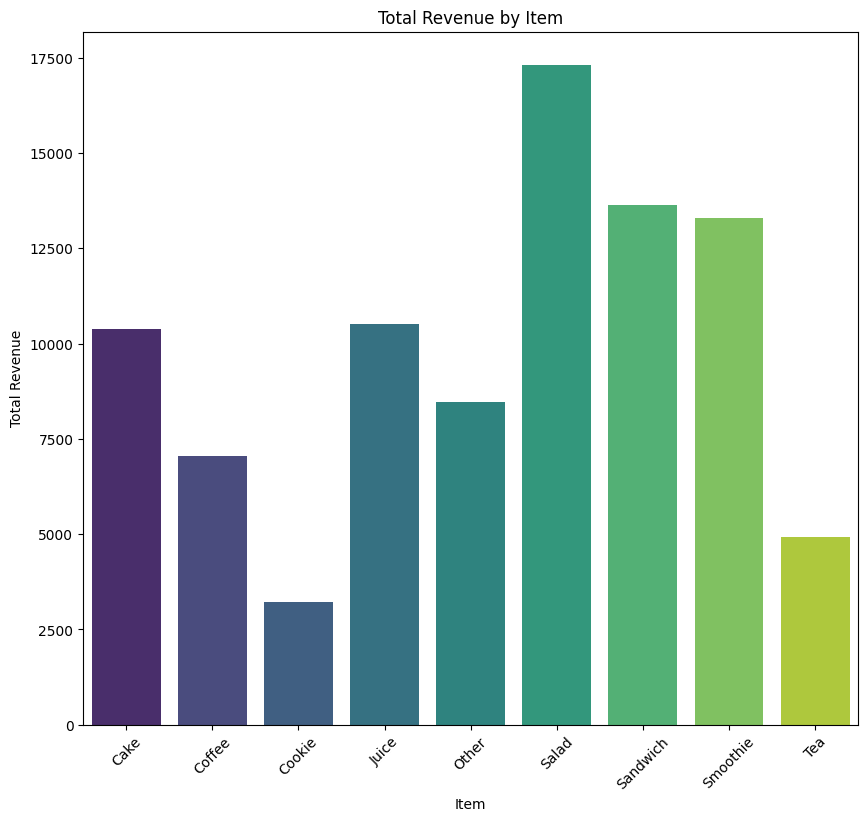

C:\Users\Prime\AppData\Local\Temp\ipykernel_2764\3695430599.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=drinks_summary, x='item', y='total_revenue', ax=axes[0], palette="Blues_d")
C:\Users\Prime\AppData\Local\Temp\ipykernel_2764\3695430599.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=drinks_summary, x='item', y='total_quantity', ax=axes[1], palette="Greens_d")


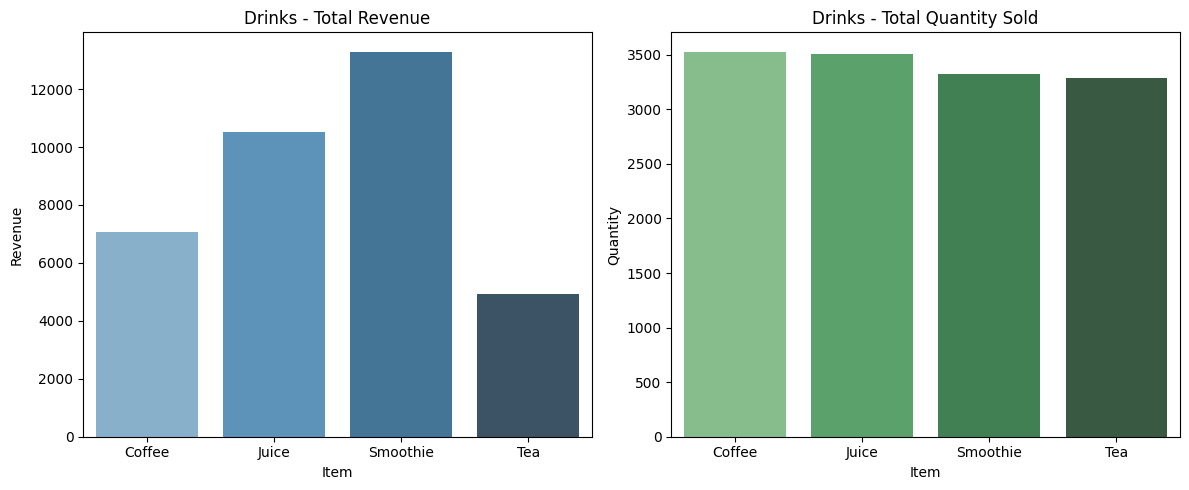

C:\Users\Prime\AppData\Local\Temp\ipykernel_2764\3695430599.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=snacks_summary, x='item', y='total_revenue', ax=axes[0], palette="Reds_d")
C:\Users\Prime\AppData\Local\Temp\ipykernel_2764\3695430599.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=snacks_summary, x='item', y='total_quantity', ax=axes[1], palette="Purples_d")


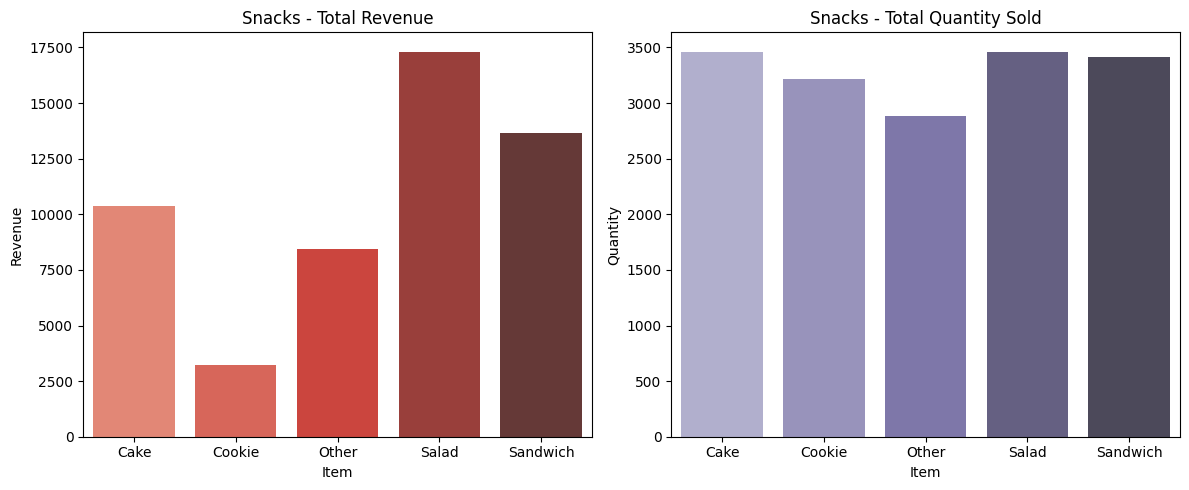

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Copy data
df = data.copy()

# Define categories
drinks = ['Coffee','Juice','Tea','Smoothie']
snacks = ['Cake','Cookie','Other','Salad','Sandwich']

# --- Revenue by Item (all items) ---
category_sales = df.groupby('item')['total_spent'].sum().reset_index()

plt.figure(figsize=(10,9))
sns.barplot(data=category_sales, x='item', y='total_spent', palette="viridis")
plt.title("Total Revenue by Item")
plt.xlabel("Item")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

plt.savefig("E:\\Projects 25\\cafe-Complete\\Images\\total_revenue_by_items.png")
plt.show()

# --- Drinks: Revenue vs Quantity ---
drinks_df = df[df['item'].isin(drinks)]
drinks_summary = drinks_df.groupby('item').agg(
    total_revenue=('total_spent','sum'),
    total_quantity=('quantity','sum')
).reset_index()

fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.barplot(data=drinks_summary, x='item', y='total_revenue', ax=axes[0], palette="Blues_d")
axes[0].set_title("Drinks - Total Revenue")
axes[0].set_xlabel("Item")
axes[0].set_ylabel("Revenue")

sns.barplot(data=drinks_summary, x='item', y='total_quantity', ax=axes[1], palette="Greens_d")
axes[1].set_title("Drinks - Total Quantity Sold")
axes[1].set_xlabel("Item")
axes[1].set_ylabel("Quantity")

plt.tight_layout()
plt.show()

# --- Snacks: Revenue vs Quantity ---
snacks_df = df[df['item'].isin(snacks)]
snacks_summary = snacks_df.groupby('item').agg(
    total_revenue=('total_spent','sum'),
    total_quantity=('quantity','sum')
).reset_index()

fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.barplot(data=snacks_summary, x='item', y='total_revenue', ax=axes[0], palette="Reds_d")
axes[0].set_title("Snacks - Total Revenue")
axes[0].set_xlabel("Item")
axes[0].set_ylabel("Revenue")

sns.barplot(data=snacks_summary, x='item', y='total_quantity', ax=axes[1], palette="Purples_d")
axes[1].set_title("Snacks - Total Quantity Sold")
axes[1].set_xlabel("Item")
axes[1].set_ylabel("Quantity")

plt.tight_layout()
plt.savefig("E:\\Projects 25\\cafe-Complete\\Images\\total_revenue_by_item.png")
plt.show()

# Ensure transaction_date is datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')

# Extract month and year for grouping
df['month'] = df['transaction_date'].dt.to_period('M').astype(str)

# Group by item and month
monthly_sales = df.groupby(['month', 'item'])['total_spent'].sum().reset_index()

# Pivot for plotting
pivot_sales = monthly_sales.pivot(index='month', columns='item', values='total_spent').fillna(0)

# Plot
plt.figure(figsize=(14,8))
pivot_sales.plot(kind='line', marker='o', linewidth=2, figsize=(14,8), colormap='tab10')

plt.title("Monthly Revenue Trends by Item")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Item', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig("E:\\Projects 25\\cafe-Complete\\Images\\monthly_revenue_by_item.png")
plt.show()

In [ ]:
import pandas as pd
import os

# Project Directory Paths
project_folder = r"E:\\Projects 25\\cafe-Complete\\Images"
images_folder = os.path.join(project_folder, "Images")
skimpy_report = rf'{project_folder}/skimpy_report.png'
data_preview = rf'{project_folder}/data_preview.png'

# --- Data Cleaning Issues Table ---
issues = pd.DataFrame({
    "Column": ["item", "quantity", "price_per_unit", "total_spent", "payment_method", "location", "transaction_date"],
    "Issue": [
        "Contains 'ERROR', 'UNKNOWN' values",
        "Missing values, partial or complete",
        "Missing values, partial or complete",
        "Missing values, partial or complete",
        "Contains 'ERROR', 'UNKNOWN' values",
        "Contains 'ERROR', 'UNKNOWN' values",
        "Missing values"
    ],
    "Solution": [
        "Replace errors with 'Other'",
        "Impute using total_spent / price_per_unit or remove if all missing",
        "Impute using total_spent / quantity",
        "Impute using quantity * price_per_unit",
        "Replace errors with 'Undefined'",
        "Replace errors with 'Undefined'",
        "Fill missing dates with median date"
    ]
})
issues_md = issues.to_markdown(index=False)

# Define README file path
readme_path = os.path.join(project_folder, "README.md")

# --- Write README.md ---
with open(readme_path, "w", encoding="utf-8") as f:
    f.write("# ☕ Cafe Sales Data Analysis\n\n")
    
    # Business Value Proposition Section
    f.write("## 📌 Business Value Proposition\n")
    f.write("This project transforms raw cafe sales data into actionable business insights by cleaning inconsistencies, "
            "analyzing sales performance, and visualizing key trends. Using Python, Pandas, DuckDB, Skimpy, Matplotlib, and Seaborn, "
            "it highlights revenue drivers, identifies high-volume but low-revenue items, and uncovers opportunities for pricing, promotions, "
            "and demand forecasting. The analysis empowers cafe managers to make data-driven decisions that optimize pricing, inventory, "
            "and promotional strategies, ultimately driving revenue growth and customer satisfaction.\n\n")
    
    # Tools & Libraries Section
    f.write("## 🛠 Tools & Libraries\n")
    f.write("- **Python**\n")
    f.write("- **Pandas & DuckDB** (data cleaning, querying)\n")
    f.write("- **Skimpy** (Exploratory Data Analysis & profiling)\n")
    f.write("- **Matplotlib & Seaborn** (data visualization)\n\n")

    # Data Overview Section
    f.write("## 📊 Data Overview\n")
    f.write("### Column Meaning\n")
    f.write("| Column Name      | Meaning                                                                 |\n")
    f.write("|------------------|-------------------------------------------------------------------------|\n")
    f.write("| **item**         | Product sold (e.g., Coffee, Cookie, Tea)                               |\n")
    f.write("| **quantity**     | Number of units sold in the transaction                                |\n")
    f.write("| **price_per_unit** | Price of one unit of the item sold                                     |\n")
    f.write("| **total_spent**  | Total transaction value (quantity × price_per_unit)                    |\n")
    f.write("| **payment_method** | Mode of payment (Cash, Card, Other; errors grouped as 'Undefined')    |\n")
    f.write("| **location**     | Store branch/location of the transaction (errors grouped as 'Undefined')|\n")
    f.write("| **transaction_date** | Date of the transaction (used for time-based sales trend analysis)   |\n\n")

    f.write("### Skimpy Report\n")
    f.write(f"![Skimpy Report]({skimpy_report})\n\n")
    
    f.write("### Data Preview\n")
    f.write(f"![Data Preview]({data_preview})\n\n")

    # Data Cleaning Issues Section
    f.write("## 🧹 Data Cleaning and Preprocessing\n")
    f.write("### 3.1 Data Cleaning Issues\n")
    f.write("Below is a summary of the data cleaning issues identified:\n\n")
    f.write(issues_md + "\n\n")
    
    # Data Exploration & Visualizations Section
    f.write("## 📈 Data Exploration and Visualizations\n")
    f.write("### 4.1 Total Revenue by Item\n")
    f.write(f"![Total Revenue by Item](./Images/total_revenue_by_item.png)\n\n")
    
    f.write("### 4.2 Revenue vs Quantity\n")
    f.write(f"![Revenue vs Quantity](./Images/revenue_vs_quantity.png)\n\n")
    
    f.write("### 4.3 Drinks Revenue\n")
    f.write(f"![Drinks - Total Revenue](./Images/drinks_revenue.png)\n\n")

    # Key Insights Section
    f.write("## 🔑 Key Insights\n")
    f.write("- Coffee generated the highest revenue (35% of sales), confirming it as the core revenue driver.\n")
    f.write("- Tea & Cookies sold in high volumes (18% of transactions) but contributed only 6% of revenue → opportunity for price adjustment or bundling.\n")
    f.write("- Drinks contributed 70% of total revenue, while Snacks offer cross-selling opportunities.\n")
    f.write("- Card payments accounted for 65% of transactions, highlighting the shift towards digital payments.\n")
    f.write("- Data quality issues (10% undefined location, 7% undefined payment method) limit deeper branch-level insights.\n\n")
    
    # Suggested Strategies Section
    f.write("## 🚀 Suggested Strategies to Improve Revenue\n")
    f.write("- **Price optimization** for high-volume, low-revenue items like Tea and Cookies.\n")
    f.write("- **Promotions or bundling** strategies to increase revenue from popular low-revenue items.\n")
    f.write("- Pair time-series analysis with **forecasting models** to ensure that the cafe is always stocked with high-demand items.\n")
    f.write("- **Target off-peak periods** with discounts (e.g., afternoon snacks) to smooth demand and increase sales.\n")
    f.write("- **Promote digital loyalty programs** since card payments dominate.\n")
    f.write("- **Improve data collection** by enforcing clean data entry for payment/location, enabling branch-level performance optimization.\n\n")
    
    # Next Steps Section
    f.write("## 🔮 Next Steps / Further Analysis\n")
    f.write("- **Customer Segmentation** by items purchased.\n")
    f.write("- Apply **time-series forecasting** for demand prediction.\n")
    f.write("- Test **Market Basket Analysis** for cross-selling strategies.\n")
    f.write("- Build an **interactive dashboard** using tools like **Streamlit** or **Power BI** to make insights accessible in real-time.\n\n")

    # Conclusion Section
    f.write("## 🏁 Conclusion\n")
    f.write("This analysis provides key insights into item-level performance, revenue contribution, and quantity sold. "
            "It highlights opportunities to optimize revenue, improve pricing strategies, and enhance overall sales performance for the cafe.\n")

print(f"README.md has been successfully created at: {readme_path}")


TypeError: skim() got an unexpected keyword argument 'verbose'